In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")#white,dark,darkgrid,ticks
%matplotlib inline

In [2]:
dataset = pd.read_csv("Concrete_Data_Yeh.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
# Iterate over all columns and convert int64 to int32 and float64 to float32
df = dataset
for col in df.columns:
    if df[col].dtype == 'int64':
        df[col] = df[col].astype('int32')
    elif df[col].dtype == 'float64':
        df[col] = df[col].astype('float32')

In [5]:
dataset=df

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float32
 1   slag              1030 non-null   float32
 2   flyash            1030 non-null   float32
 3   water             1030 non-null   float32
 4   superplasticizer  1030 non-null   float32
 5   coarseaggregate   1030 non-null   float32
 6   fineaggregate     1030 non-null   float32
 7   age               1030 non-null   int32  
 8   csMPa             1030 non-null   float32
dtypes: float32(8), int32(1)
memory usage: 36.3 KB


In [7]:
dataset.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

<AxesSubplot:>

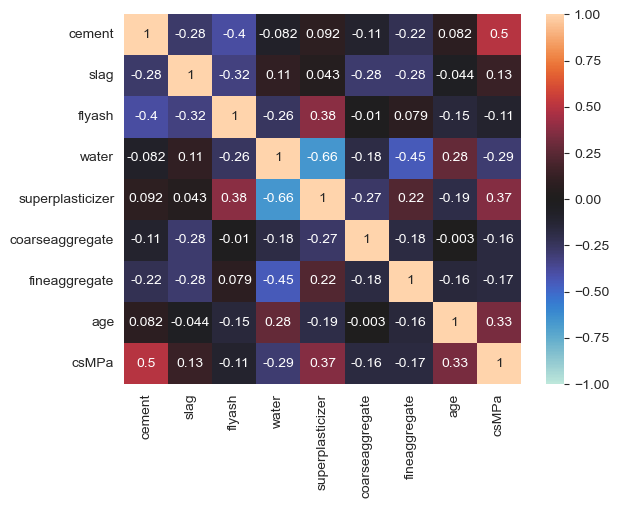

In [8]:
sns.heatmap(dataset.corr(), annot =True, vmin=-1, center=0)

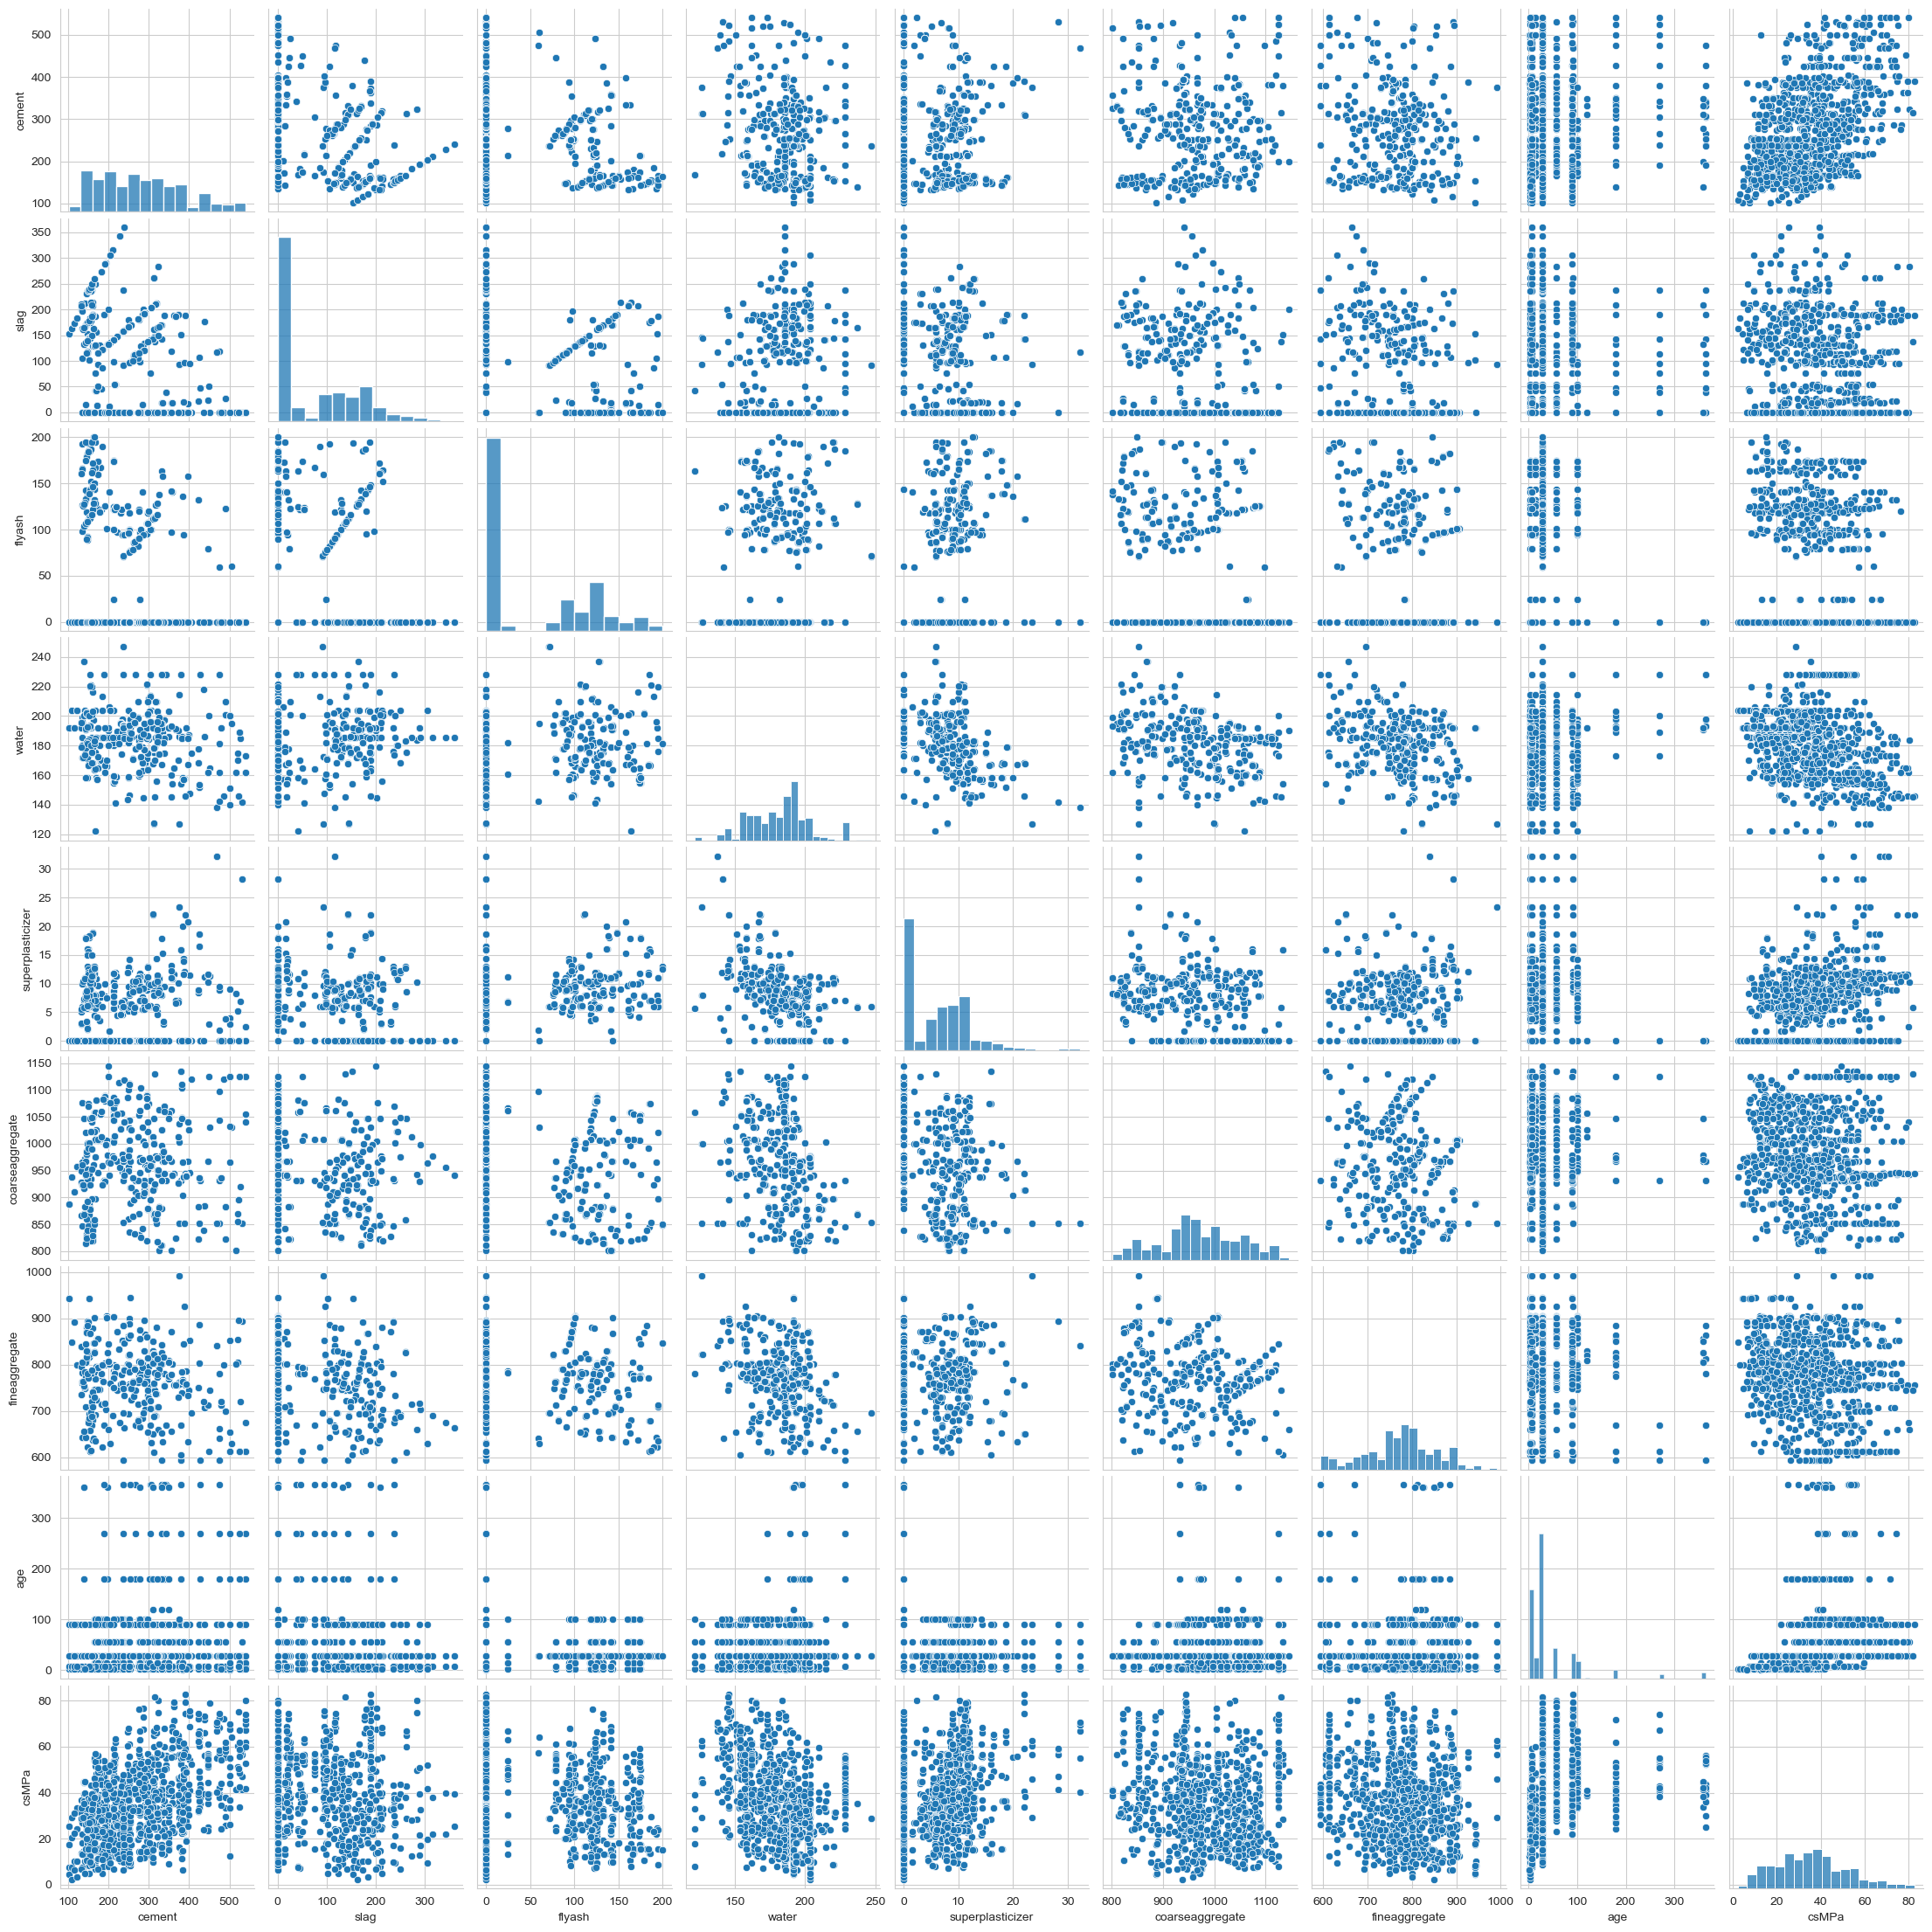

In [9]:
sns.pairplot(dataset)

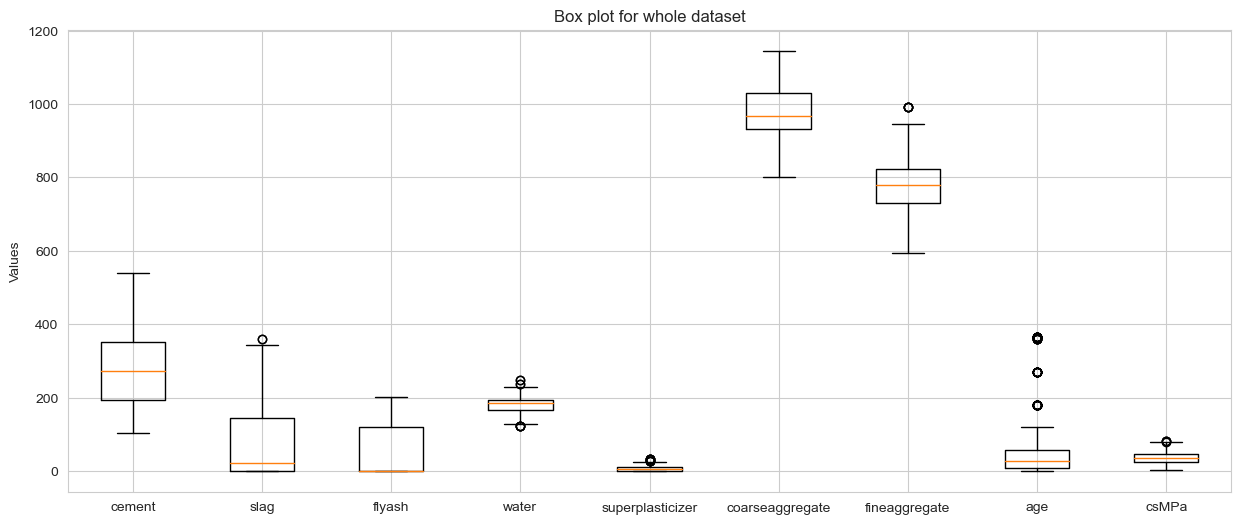

In [10]:
# Create box plot
fig, ax = plt.subplots(figsize=(15, 6))
ax.boxplot(dataset.values)
ax.set_xticklabels(dataset.columns)
ax.set_title('Box plot for whole dataset')
ax.set_ylabel('Values')
plt.show()

In [11]:
Quan=[]
Qual=[]
for column in dataset.columns:
    print(column)
    if(dataset[column].dtypes=='object'):
        Qual.append(column)
    else:
        Quan.append(column)

cement
slag
flyash
water
superplasticizer
coarseaggregate
fineaggregate
age
csMPa


In [12]:
univariate=pd.DataFrame(index=["Mean","Median","Mode","Min","25%","50%","75%",
                               "Max","IQR","1.5rule","Lesser","Greater","Variance","Std","Skew","Kurtosis"],columns=Quan)
for column in Quan:
    print(column)
    univariate[column]["Mean"]=dataset[column].mean()
    univariate[column]["Median"]=dataset[column].median()
    univariate[column]["Mode"]=dataset[column].mode()[0]
    univariate[column]["Min"]=dataset[column].min()
    univariate[column]["25%"]=np.percentile(dataset[column],25)
    univariate[column]["50%"]=np.percentile(dataset[column],50)
    univariate[column]["75%"]=np.percentile(dataset[column],75)
    univariate[column]["Max"]=np.percentile(dataset[column],100)
    univariate[column]["IQR"]=univariate[column]["75%"]-univariate[column]["25%"]
    univariate[column]["1.5rule"]=1.5*univariate[column]["IQR"]
    univariate[column]["Lesser"]=univariate[column]["25%"]-univariate[column]["1.5rule"]
    univariate[column]["Greater"]=univariate[column]["75%"]+univariate[column]["1.5rule"]
    univariate[column]["Variance"]=dataset[column].var()
    univariate[column]["Std"]=dataset[column].std()
    univariate[column]["Skew"]=dataset[column].skew()
    univariate[column]["Kurtosis"]=dataset[column].kurtosis()  

cement
slag
flyash
water
superplasticizer
coarseaggregate
fineaggregate
age
csMPa


In [13]:
lesser=[]
greater=[]
for column in Quan:
    if(univariate[column]["Min"]<univariate[column]["Lesser"]):
        lesser.append(column)
    if(univariate[column]["Max"]>univariate[column]["Greater"]):
        greater.append(column)

In [14]:
lesser

['water']

In [15]:
greater

['slag', 'water', 'superplasticizer', 'fineaggregate', 'age', 'csMPa']

In [16]:
univariate["age"]["Greater"]

129.5

In [17]:
for less in lesser:
    dataset[less][dataset[less]<univariate[less]["Lesser"]]=univariate[less]["Lesser"]
for great in greater:
    dataset[great][dataset[great]>univariate[great]["Greater"]]=univariate[great]["Greater"]

C:\Users\vijai\AppData\Local\Temp\ipykernel_5720\3780825377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[less][dataset[less]<univariate[less]["Lesser"]]=univariate[less]["Lesser"]
C:\Users\vijai\AppData\Local\Temp\ipykernel_5720\3780825377.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[great][dataset[great]>univariate[great]["Greater"]]=univariate[great]["Greater"]


In [18]:
univariate=pd.DataFrame(index=["Mean","Median","Mode","Min","25%","50%","75%",
                               "Max","IQR","1.5rule","Lesser","Greater","Variance","Std","Skew","Kurtosis"],columns=Quan)
for column in Quan:
    print(column)
    univariate[column]["Mean"]=dataset[column].mean()
    univariate[column]["Median"]=dataset[column].median()
    univariate[column]["Mode"]=dataset[column].mode()[0]
    univariate[column]["Min"]=dataset[column].min()
    univariate[column]["25%"]=np.percentile(dataset[column],25)
    univariate[column]["50%"]=np.percentile(dataset[column],50)
    univariate[column]["75%"]=np.percentile(dataset[column],75)
    univariate[column]["Max"]=np.percentile(dataset[column],100)
    univariate[column]["IQR"]=univariate[column]["75%"]-univariate[column]["25%"]
    univariate[column]["1.5rule"]=1.5*univariate[column]["IQR"]
    univariate[column]["Lesser"]=univariate[column]["25%"]-univariate[column]["1.5rule"]
    univariate[column]["Greater"]=univariate[column]["75%"]+univariate[column]["1.5rule"]
    univariate[column]["Variance"]=dataset[column].var()
    univariate[column]["Std"]=dataset[column].std()
    univariate[column]["Skew"]=dataset[column].skew()
    univariate[column]["Kurtosis"]=dataset[column].kurtosis()  

cement
slag
flyash
water
superplasticizer
coarseaggregate
fineaggregate
age
csMPa


In [19]:
lesser=[]
greater=[]
for column in Quan:
    if(univariate[column]["Min"]<univariate[column]["Lesser"]):
        lesser.append(column)
    if(univariate[column]["Max"]>univariate[column]["Greater"]):
        greater.append(column)

In [20]:
lesser

[]

In [21]:
greater

['superplasticizer']

In [22]:
univariate["superplasticizer"]["Greater"]

25.499999523162842

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float32
 1   slag              1030 non-null   float32
 2   flyash            1030 non-null   float32
 3   water             1030 non-null   float32
 4   superplasticizer  1030 non-null   float32
 5   coarseaggregate   1030 non-null   float32
 6   fineaggregate     1030 non-null   float32
 7   age               1030 non-null   float64
 8   csMPa             1030 non-null   float32
dtypes: float32(8), float64(1)
memory usage: 40.4 KB


In [24]:
# Iterate over all columns and convert int64 to int32 and float64 to float32
df = dataset
for col in df.columns:
    if df[col].dtype == 'int64':
        df[col] = df[col].astype('int32')
    elif df[col].dtype == 'float64':
        df[col] = df[col].astype('float32')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float32
 1   slag              1030 non-null   float32
 2   flyash            1030 non-null   float32
 3   water             1030 non-null   float32
 4   superplasticizer  1030 non-null   float32
 5   coarseaggregate   1030 non-null   float32
 6   fineaggregate     1030 non-null   float32
 7   age               1030 non-null   float32
 8   csMPa             1030 non-null   float32
dtypes: float32(9)
memory usage: 36.3 KB


In [26]:
dataset=df

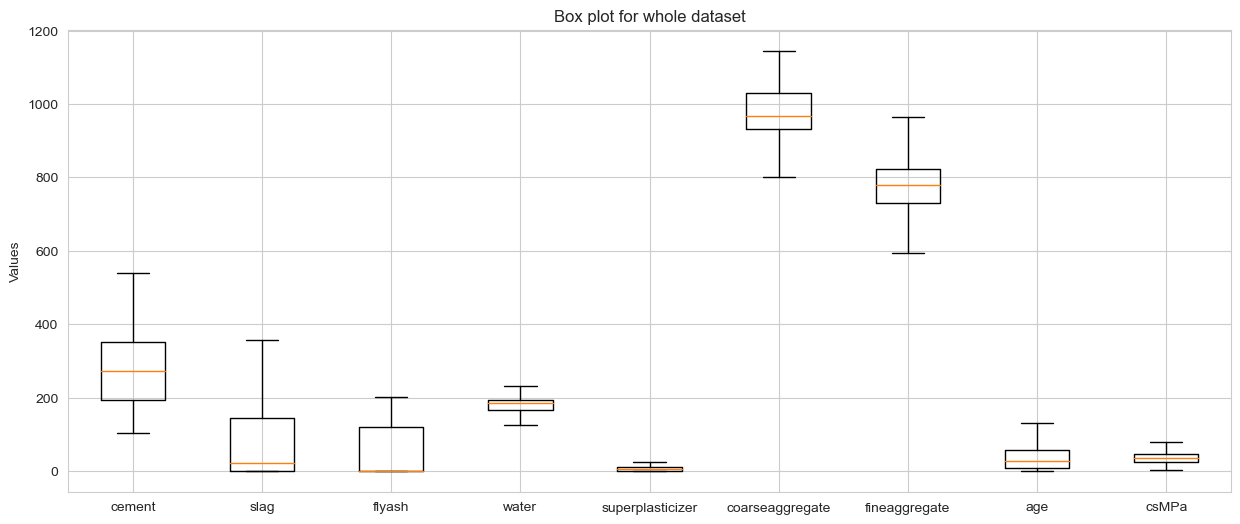

In [27]:
# Create box plot
fig, ax = plt.subplots(figsize=(15, 6))
ax.boxplot(dataset.values)
ax.set_xticklabels(dataset.columns)
ax.set_title('Box plot for whole dataset')
ax.set_ylabel('Values')
plt.show()

skewness of the dataset: [ 0.50873846  0.7985584   0.5365708   0.05511071  0.66774505 -0.04016175
 -0.2856601   1.2623658   0.41144627]


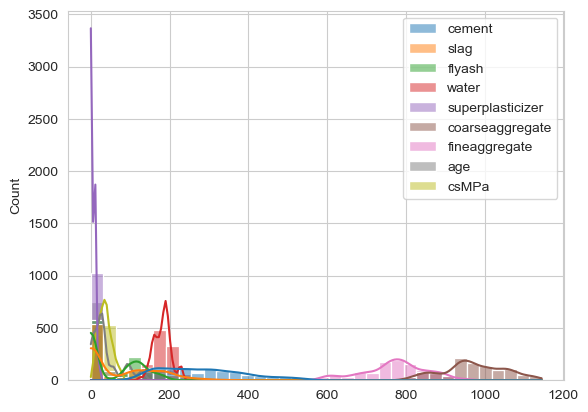

In [28]:
from scipy.stats import skew
# Plot a histogram of the data to visualize the skewness
sns.histplot(dataset, kde=True)
data_skewness = skew(dataset)
print("skewness of the dataset:",data_skewness)

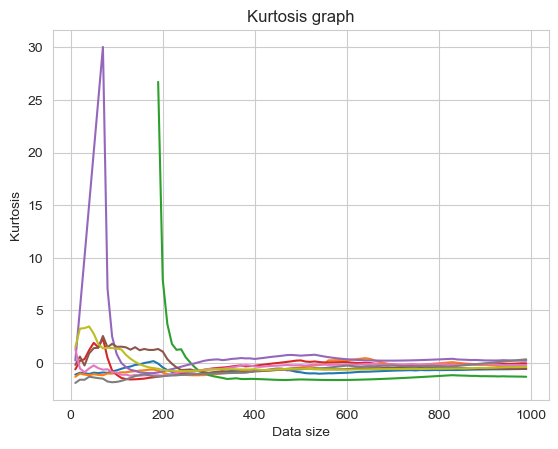

In [29]:
from scipy.stats import kurtosis
# Calculate the kurtosis values for different data sizes
n_values = range(10, 1000, 10)
kurtosis_values = [kurtosis(dataset[:n]) for n in n_values]


# Plot the kurtosis values
plt.plot(n_values, kurtosis_values)
plt.xlabel('Data size')
plt.ylabel('Kurtosis')
plt.title('Kurtosis graph')
plt.show()

In [30]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

Mean=38.070, Standard Deviation=35.782
The area between range(20,50):0.32342059543172696


C:\Users\vijai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.32342059543172696

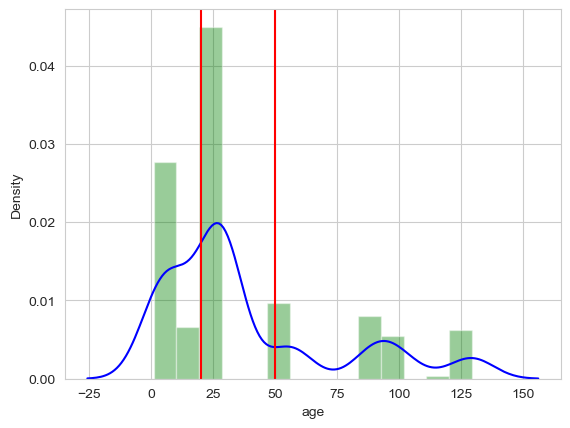

In [31]:
get_pdf_probability(dataset['age'],20,50)

<AxesSubplot:xlabel='flyash', ylabel='water'>

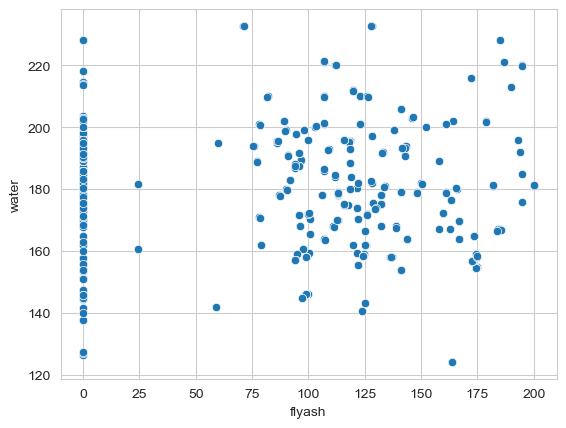

In [32]:
sns.scatterplot(x="flyash",y="water",data=dataset)

<AxesSubplot:xlabel='cement', ylabel='csMPa'>

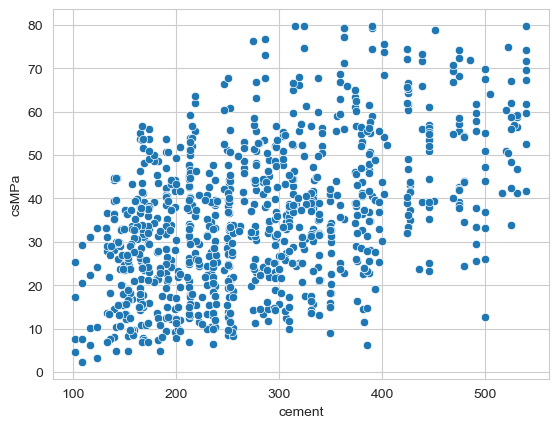

In [33]:
sns.scatterplot(x="cement",y="csMPa",data=dataset)

<AxesSubplot:xlabel='slag', ylabel='cement'>

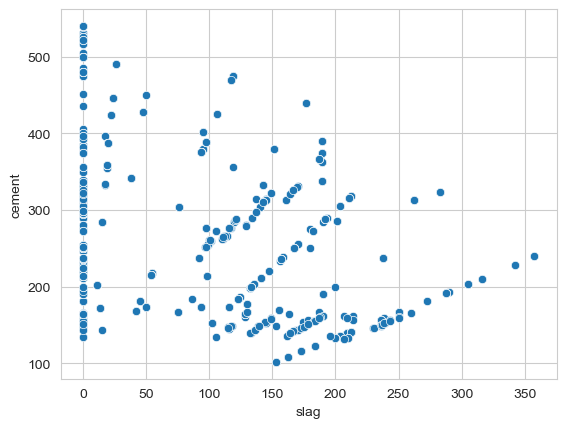

In [34]:
sns.scatterplot(x="slag",y="cement",data=dataset)

In [35]:
#independent variable is an input(age,bmi,children)
independent = dataset[["cement","flyash","water","superplasticizer","coarseaggregate","fineaggregate","age"]]
#Depedent variable is output(charges)
dependent = dataset[["csMPa"]]

In [36]:
#Creating a model for train set
#from sklearn library call model_selection function and import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent,dependent, test_size = 0.2, random_state = 0)

In [37]:
#Standardization is changing every colume into same range of value
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {"criterion":["mae","mse","friedman_mse"],
             "n_estimators":[10,100],"max_features":["auto","sqrt","log2"]}

grid = GridSearchCV(RandomForestRegressor(), param_grid, refit=True, verbose = 3,n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\vijai\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mae', 'mse', 'friedman_mse'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100]},
             verbose=3)

In [39]:
re=grid.cv_results_
grid_predictions=grid.predict(X_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,grid_predictions)
print("The R_score value for best parameter{}:".format(grid.best_params_),r_score)

The R_score value for best parameter{'criterion': 'friedman_mse', 'max_features': 'auto', 'n_estimators': 100}: 0.912367572416605


In [40]:
table=pd.DataFrame.from_dict(re)

In [41]:
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.343621,0.089907,0.009375,0.007655,mae,auto,10,"{'criterion': 'mae', 'max_features': 'auto', '...",0.875058,0.888418,0.872233,0.816773,0.868844,0.864265,0.024657,12
1,3.108056,0.152065,0.028129,0.006249,mae,auto,100,"{'criterion': 'mae', 'max_features': 'auto', '...",0.896117,0.906492,0.881376,0.846370,0.894907,0.885052,0.020924,2
2,0.146987,0.012704,0.007851,0.006989,mae,sqrt,10,"{'criterion': 'mae', 'max_features': 'sqrt', '...",0.901828,0.857570,0.834771,0.830475,0.885413,0.862011,0.027890,15
3,1.411244,0.100956,0.031254,0.000001,mae,sqrt,100,"{'criterion': 'mae', 'max_features': 'sqrt', '...",0.893686,0.890882,0.878638,0.852242,0.898510,0.882792,0.016624,5
4,0.112508,0.006249,0.012500,0.006250,mae,log2,10,"{'criterion': 'mae', 'max_features': 'log2', '...",0.841167,0.844330,0.863948,0.821224,0.889659,0.852066,0.023170,17
5,1.356344,0.060439,0.025003,0.007655,mae,log2,100,"{'criterion': 'mae', 'max_features': 'log2', '...",0.891483,0.897284,0.871829,0.847897,0.899136,0.881526,0.019403,7
6,0.062504,0.000001,0.006250,0.007654,mse,auto,10,"{'criterion': 'mse', 'max_features': 'auto', '...",0.876969,0.895168,0.861149,0.838980,0.884455,0.871344,0.019609,11
7,0.662548,0.018751,0.025001,0.007654,mse,auto,100,"{'criterion': 'mse', 'max_features': 'auto', '...",0.888417,0.896872,0.887094,0.848359,0.889192,0.881987,0.017157,6
8,0.053129,0.007655,0.006251,0.007656,mse,sqrt,10,"{'criterion': 'mse', 'max_features': 'sqrt', '...",0.871065,0.875074,0.844744,0.812319,0.853231,0.851287,0.022459,18
9,0.450029,0.011693,0.031254,0.000002,mse,sqrt,100,"{'criterion': 'mse', 'max_features': 'sqrt', '...",0.884650,0.894100,0.877840,0.852740,0.897442,0.881354,0.015895,9
